# **Project 3E**

### **Scientific Question: How genetically similar are human GI bacteria to each other?** 

The human gut microbiome consists of bacteria, archaea, fungi, and viruses that perform important functions for the human body including immune development, pathogen colonization resistance, and food metabolism. A disturbance of the gut microbiome's ecological balance, usually caused by antibiotics, can cause and intensify diseases such as diabetes, obesity, IBS, and depression. (Schwartz et al., 2020)

Research has shown that broad-spectrum antibiotics may affect human health and their ability to digest food. Overuse of antibiotics can lead to an increase in the number of antibiotic-resistant bacteria that eventually cause illness that is difficult to treat with antibiotics. Global effects of antibiotic use can be seen in hot metabolic, hormonal and immune homeostasis. 

In order to accurately compare the similarity of gut bacteria, the 16s rRNA was analyzed as 16s rRNA is commonly used to identify bacteria at the species level. Sequences of these bacteria were obtained from NCBI (https://www.ncbi.nlm.nih.gov/nuccore). NCBI houses a series of databases relevant to biotechnology and biomedicine and is an important resouse for bioinformatics tools and services. The gene section of NCBI is able to provide information on a gene's genomic map, expression, sequence, protein function, structure, and homology data. 

### **Scientific Hypothesis: If the nine most abundant human GI bacteria are genetically similar to each other, then the overuse of ampicillin, a commonly used antibiotic, would be a reason for dysbiosis in the gut microbiome.** 

In [2]:
import pandas as pd
import numpy as np
import scipy as scip
import matplotlib.pyplot as plt
from Bio.pairwise2 import format_alignment
import Bio 
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Cluster import kcluster
from Bio import pairwise2
from numpy import array
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

In [20]:
#opening files of 16s rRNA gene in bacteria and assigning them to corresponding variables
for fasta in SeqIO.parse("Bacteroides_fragilis.fasta", "fasta"):
    #converting each read file into a string 
    bac_frag_genome = str(fasta.seq)

for fasta in SeqIO.parse("prevotella_melaninogenica.fasta", "fasta"):
    prev_mela_genome = str(fasta.seq)

for fasta in SeqIO.parse("bacteroides_oralis.fasta", "fasta"):
    bac_oralis_genome = str(fasta.seq)

for fasta in SeqIO.parse("e_coli.fasta", "fasta"):
    e_coli_genome = str(fasta.seq)

for fasta in SeqIO.parse("enterobacter_cloacae.fasta", "fasta"):
    entero_clo_genome = str(fasta.seq)

for fasta in SeqIO.parse("klebsiella_pneumoniae.fasta", "fasta"):
    kleb_pneu_genome = str(fasta.seq)

for fasta in SeqIO.parse("bifidobacterium_bifidum.fasta", "fasta"):
    bifido_bifidum_genome = str(fasta.seq)
    
for fasta in SeqIO.parse("staphylococcus_aureus.fasta", "fasta"):
    staph_aur_genome = str(fasta.seq)
    
for fasta in SeqIO.parse("lactobacillus.fasta", "fasta"):
    lac_genome = str(fasta.seq)

#uncomment the code below to check that the variable is a string data type and that the file was correctly read 
#print(type(lac_genome))
#print(lac_genome)

In [21]:
#aligning each 16s rRNA gene with most populous bacterium in gut microbiome: bacteroides fragilis 
alignments_1 = pairwise2.align.localxx(bac_frag_genome,prev_mela_genome)
alignments_2 = pairwise2.align.localxx(bac_frag_genome,bac_oralis_genome)
alignments_3 = pairwise2.align.localxx(bac_frag_genome,e_coli_genome)
alignments_4 = pairwise2.align.localxx(bac_frag_genome,entero_clo_genome)
alignments_5 = pairwise2.align.localxx(bac_frag_genome,kleb_pneu_genome)
alignments_6 = pairwise2.align.localxx(bac_frag_genome,bifido_bifidum_genome)
alignments_7 = pairwise2.align.localxx(bac_frag_genome,staph_aur_genome)
alignments_8 = pairwise2.align.localxx(bac_frag_genome,lac_genome)

### Pairwise alignment between Bacteroides Fragilis and Other Bacterium ###

In [22]:
#Showing alignment of 9 chosen bacteria with original most populous bacterium: bacteroides fragilis
#Pairwise alignment between Bacteroides Fragilis and Prevotella Melaninogenica
for a in alignments_1:
    #converts aligment into a more readable format with first the alignment then the alignment score 
    print(format_alignment(*a))

28 GATGAACGCTAGCTACAGGCTTAACACATGCAAGTC-GAGGGGCATCA--GGA-A--GAAAGCTTGCTT----TCTTTGCTG--G-CGACCGGCGCACGGGTGAGTAACA-CGTATCCAACCTG-CCCT-TTACTCG-GGGATAG-CCTTT-C-GAAAGAA--AGAT-TAATACCCG-ATAG-CATAAT-GATTC--CG-CATG--G-TTTC-ATTAT-TAAAGGATTC---CGGTAAA-GGATGGGGATGCGTTCC--ATTAGG-TTGTTGGT-GAGG-TAACGGCTC-ACCAAGC-CTT--CGATGG-A-TAGGGGTTCTGAGAGGAAGGTCCCCCACATTGGAACTGAGACACGGTCCAAACTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGG-CGCT-A-GC-CTGAACCAGCCAAGTAGCGTGA-AGGATGAA-GGCTC-TATGGGTC-GTAAACTT-CTTTTA-TATAAGA---ATAAAGTGCAGTATGTAT--AC-TGT---T-TTGT--ATG-TATT--ATAT-GAATAAGGATC-GGCTAACT-CCGTGCCAGCAGCCGCGGTAATACGGA-GGATCCGAG-CGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGG-TGGACTGG-T-AAGTCAGT-T-GTGAAAGTT-T-G-CGGCTCAACCGTAA---AATTGCAGTT-G-ATACTGTCAGT--C-TTGAGTACAGT-AG-AG--GTG-GGCGGAATTCGTG-GTGTAGCGGTGAAATGCTTAGATATC-ACGAAGAACTCCGATTGCGAAGGCAGCTC-ACTGG-A-CTGCAACTGACA-CTGAT--GCTCGAAAGTGTG-GG-TATCAAACAGGATTAGATACCCTGGTAGTCCA-CACAGTAAACGATGA-ATA-CTC-GCTGTTTGCGATATACA--G-TA--AGCGGCC-AAGCGAAAGCATTAAGT-ATTCC-ACCTGGGGAGTACGCCGGCAACGGTG

In [23]:
#Pairwise alignment between Bacteroides Fragilis and Bacteroides Oralis 
for a in alignments_2:
    print(format_alignment(*a))

28 GATGAACGCTAGCTACAGGCTTAACACATGCAAGTCGA-GGGGCATCA-GGAAGAAAGCTTGCTTT-C---TTT-GC-TGGCGACCGGCGCACGGGTGAGTAACA-CGTATCCAACCTG-CCCT-TTACT-CGGGG-ATAGCCT---TTCGAAAGAAAGAT-----TAATAC-CCGATA-GCATAATGATTCCGCAT-G--GTTTCAT-TA-TT---A--AA-GG-AT-T-C---CGGTAAA-GGATGGGGATGCGTTCC-ATTAG---GTT--GTTG-GTGAGGTAACGGCTC-ACCAAGC---CT-TCGAT-GGATAGGGGTTCTGAGAGGAAGGTCCCCCACAT-TGGAACTGAGACACGGTCCAA-ACTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGCTA-GCCTGAACCAGCCAAGTAGCGTGA-AGGATGAA-GGCTC-TATGGGTC-GTAAACTT-CTTTTATATAAGA-----ATAAAGT-GCAGTATGTAT-AC-TGT---TTTGTATGT-AT--TAT----ATGAATAAGGATC-GGCTAACT-CCGTGCCAGCAGCCGCGGTAATACGGA-GGATCCGAG-CGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACTG-GT-----AAGTCAGT--TGTGAAAGTTTG--C-GGCTCAACCG-TAAA-AT-TGCAGTT-G--ATACTGTCAG---TCTTGAGTAC--AGTAGAGGTG--GGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGA-AGGCAGCTCACTGGACTG---C--AACTGACA-CTGAT-GCTCGAAAGTGT-GGGTATCA-AACAGGATTAGATACCCTGGTAGTCCA-CACAG-TAAACGATGA-ATA-CTC-GCTGT-----TT----GCGATATACAGTAAGC-GGCCAAGCGAAAGCA-TTAAGT-ATTCC-ACCTGGGGAGTA

In [24]:
#Pairwise alignment between Bacteroides Fragilis and E. Coli 
for a in alignments_3:
    print(format_alignment(*a))

10 AGTTTGATCC-TGGCTCAGGAT-GAACGCTAG-CTA--CAGGCT-TAACACATGCAAGTCGAGG--GGCAT--CAGGAAGAA-AGCTTGCTTT-CTTTGCTGG-CGACCG-GCGC--ACGGGTGAGTAACACGTA-TCC----AAC-CTGCCCTTT-ACTCGG-GG---ATAGC-CTTT-C-GAAAGAAA-GA-T---TAATACCCGATAGCATAAT-GATTCCGCATG-GTTTCATTATT-AAAGGATTCCGGTAAAGG-A--T--GGG------G--ATGCG--T-T-CC-ATT-A-GG--TT-G-T--T-GGTGAGG-TAACGGCTCACCA-AGCCTT-CGATG-GAT----AGG--GGTTCTGAGAGGAAGGTCC--CC--CA-CAT-TGGAACTGAGACACGGTCCAA-ACTCCTACGGGAGGCAGCAGTGAGG-AATATTGGTCA-A-TGGGCGCTA-GCCTGAAC--CAGCCAAGTAGC-G--TGA-AG-GAT-GAAGGCTCTAT-GGGTC-GTAAACT-T-CTTTT-AT------AT--AAGA--A-TAAAGTGCAGTATGTATACTGT-TTTG-T-ATGT-A--TTAT-----ATGAAT-AAGG-ATC-GGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGA-TCCG-A-GCGTTA-TCCGGAT-TTAT-TGGGTT--TAAAGG-G-AGCGT-AGGT-GGACTG--GT-AAGTCAGT-TGTGAAAGTTTGC---GG-CTCAACCGTAA---AAT-TGCAGT-TGATACTGT-CA-GTCTTGAGTACA--GTAGAGGTGGGCG--GAATTCGT--GGTGTAGCGGTGAAATGCT-TAGAT-ATCAC-GA-AG-AACT-CCGAT-TG-CGAAGGCAG-CTCAC--TGGACTGCAA--CTGACA-CTG-ATGC-T-CGAAAGT-GTGGGT-AT-CAAACAGGATTAGATACCCTGGTAGTCCACA-CA-GTAAACGATGAATACTC

In [25]:
#Pairwise alignment between Bacteroides Fragilis and Enterobacter Cloacae
for a in alignments_4:
    print(format_alignment(*a))

1 ACAAT-GAAGAGTTTGATCC-TGGCTCAGGAT-GAACGCTAG-CTA--CAGGCT-TAACACATGCAAGTCGAG--GG--GCATCAGGAAGAAAGCTTGCTTTCTTTGCTGGCG--ACCG-GC-G-C--ACGGGTGAGTAACACGTA-TCC----AAC-CTGCCCTTT-ACTCGG-GG---ATAGC-CTTT-C-GAAAGAAA-GA-T---TAATACCCGATAGCATAATGATTCCGCATG-GTTTCATT--ATTAA-AGG---A--TTCCGG---TA------A--AGGATGGGGATGCGTTCCATT-A-GG--TT-G-T--T-GGTGAGG-TAACGGCTCACCA-AGCCTT-CGATG-GAT----AGG--GGTTCTGAGAGGAAGGTC--CC--CCACAT-TGGAACTGAGACACGGTCCAA-ACTCCTACGGGAGGCAGCAGTGAGG-AATATTGGTCA-A-TGGGCGCTA-GCCTGAAC--CAGCCAAGTAGC-G--TGA-AG-GAT-GAAGGCTCTAT-GGGTC-GTAAACT-T-CTTTTATATA-AGAAT-----A--AAGTGCA-GTATGT----A-TA-CT-GTTTT--GT-A-TGT-A--TTAT-----ATGAAT-AAGG-ATC-GGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGA-TCCG-A-GCGTTA-TCCGGAT-TTAT-TGGGTT--TAAAGG-G-AGCGT-AGGT-GGA-CTGGT-AAGTCAGT--TGTGAAAGTTTGC---GG-CTCAACCGTAA---AAT-TGCAGTT-GATA-CTGT-CAGT-CTTG-AGTACA--GTAGAGGTGGGCG--GAATTCGT--GGTGTAGCGGTGAAATGCT-TAGAT-ATCAC-GA-AG-AACT-CCGAT-TG-CGAAGGCAG-CTCAC--TGGACTGCAA---CTGACA-CTG-ATGC-T-CGAAAGT-GTGGGT-AT-CAAACAGGATTAGATACCCTGGTAGTCCACA-CA-G

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




1 ACAAT-GAAGAGTTTGATCC-TGGCTCAGGA-TGAACGCTAG-CT-ACAGGCTTAACACATGCAAGTCGAG--GG--GCATCAGGAAGAAAGCTTGCTTTCTTTGCTGGCG--ACCG-GC-G-C--ACGGGTGAGTAACACGTA-TCC----AAC-CTGCCCTTT-ACTCGG-GG---ATAGC-CTTT-C-GAAAGAAA-GA-T---TAATACCCGATAGCATAATGATTCCGCATG-GTTTCATT--ATTAA-AGG---A--TTCCGG---TA------A--AGGATGGGGATGCGTTCCATT-A-GG--TT-G-T--T-GGTGAGG-TAACGGCTCACCA-AGCCTT-CGATG-GAT----AGG--GGTTCTGAGAGGAAGGTC--CC--CCACAT-TGGAACTGAGACACGGTCCAA-ACTCCTACGGGAGGCAGCAGTGAGG-AATATTGGTCA-A-TGGGCGCTA-GCCTGAAC--CAGCCAAGTAGC-G--TGA-AG-GAT-GAAGGCTCTAT-GGGTC-GTAAACT-T-CTTTTATATA-AGAAT-----A--AAGTGCA-GTATGT----A-TA-CT-GTTTT--GT-A-TGT-A--TTAT-----ATGAAT-AAGG-ATC-GGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGA-TCCG-A-GCGTTA-TCCGGAT-TTAT-TGGGTT--TAAAGG-G-AGCGT-AGGT-GGA-CTGGT-AAGTCAGT--TGTGAAAGTTTGC---GG-CTCAACCGTAA---AAT-TGCAGTT-GATA-CTGT-CAGT-CTTG-AGTACA--GTAGAGGTGGGCG--GAATTCGT--GGTGTAGCGGTGAAATGCT-TAGAT-ATCAC-GA-AG-AACT-CCGAT-TG-CGAAGGCAG-CTCAC--TGGACTGCAA---CTGACA-CTG-ATGC-T-CGAAAGT-GTGGGT-AT-CAAACAGGATTAGATACCCTGGTAGTCCACA-CA-GT

In [26]:
#Pairwise alignment between Bacteroides Fragilis and Klebsiella Pneumoniae 
for a in alignments_5:
    print(format_alignment(*a))

8 AGAGTTTGATCC--TGGCTCAGGAT-GAACGCTAG-CTA--CAGGCT-TAACACATGCAAGTCGAG-GG--GCATCAGGAAGAAAGCTTGCTTTCTTTGCTGGCG--ACCG-GCG-C--ACGGGTGAGTAACACGTA-TCC----AAC-CTGCCCTTT-ACTCGG-GG---ATAGC-CTTT-C-GAAAGAAA-GA-T---TAATACCCGATAGCATAAT-GATTCCGCATGGTTTCATT-ATT--AAAG-G----A--TTCCGG---T-A----A--AGGATGGGGATGCGTTCCATT-A-GG--TT-G-T--T-GGTGAGG-TAACGGCTCACCA-AGCCTT-CGATG-GAT----AGG--GGTTCTGAGAGGAAGGTC--CC--CCACAT-TGGAACTGAGACACGGTCCAA-ACTCCTACGGGAGGCAGCAGTGAGG-AATATTGGTCA-A-TGGGCGCTA-GCCTGAAC--CAGCCAAGTAGC-G--TGAA-G-GAT-GAAGGCTCTAT-GGGTC-GTAAA-CTT-CTTTTATATA-AGAAT-----A--AAGTGCAGTATG---T-A-TA-CTGTT-T--T-GTATGT-A--TTA---T--ATGAAT-AAGG-ATC-GGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGA-TCCG-A-GCGTTA-TCCGGAT-TTAT-TGGGTT--TAAAGG-G-AGCGT-AGGT-GGA-CTGGT-AAGTCAGT--TGTGAAAGTTTGC---GG-CTCAACCGTAA---AAT-TGCAGTT-GATA-CTGT-CAGT-CTT-GAGTACA--GTAGAGGTGGGCG--GAATTCGT--GGTGTAGCGGTGAAATGCT-TAGAT-ATCAC-GA-AG-AACT-CCGAT-TG-CGAAGGCAG-CTCAC--TGGACTGCAA---CTGACA-CTG-ATGC-T-CGAAAGT-GTGGGT-AT-CAAACAGGATTAGATACCCTGGTAGTCCACA-CA-GTAAACGATGA

In [27]:
#Pairwise alignment between Bacteroides Fragilis and Bifidobacterium Bifidum
for a in alignments_6:
    print(format_alignment(*a))

9 GAGTTTGATC-CTGGCTCAGGATGAACGCTAGCTACAG-GCTTAACACATGCAAGTCGAG--GGGCATCAGGAAG-A--AAGCTTGCTTTCTTTGC-TGGC-GACCG-GC-G-C-A-CGGGTGAGTAACA--CGT-ATCCA-ACCTGCCCTTT-A--CTCGG-GGA-TAGCCTTTC--GAAAGAAA-GA--T--TAATAC-CCG-ATAGCAT---A-ATGATTCCGCATGGTTTC-ATTAT-T---AAAGGATTC---CGG--TAAAGG-ATGGGGAT-GCGTTCCAT-T-AGG-TTGTTGGTGAGGTAACGGCTCACCAAGC-CTTCGAT-GGA-TAGG--GGTTC-TGAGAGGAAGGTC--CC--CCACATTGGA-ACTGAGAC-ACGGTCCA-A-ACTCCTACGGGAGGCAGCAGTGAGG-AATATTGGTCA-A-TGGGCGCTA-GCCTGAAC--CAGCCAAGTA-GC-G--TGAAGG-ATGA-AGGCTCTAT-GGGTC-GTAAACT-TCTTTTA-TATAAGAATAAAGTGCAGTATGT-ATACTGTT--TT-G--T-A-TGTAT--TATAT-GAATAAG-GATC-GGCTAACTC-CGTGCCAGCAGCCGCGGTAATACGG-AGGATC-CG-A-GCGTTATCCGGATTTATTGGGTT--TAAAGGGAGC--GTAGGT-GGACTG-GTAA-GTCAGT----TGTGAAAGTT---TGCGGCTC-AACCG-TAAA--AT-TGCAGTT--GA--TACTGT--CAGT--CTTG-AGTA-CAGTAG-AGGTGG-G-C-GGAATTCGT--GGTGTAG-CGGTGA-AATGCT-TAGATATCACG--AAGAACT-CCGATTG-CGAAGGCAGC-TCA-CTGGA-CT-G-CAACTGACA-CTGATGCT---CGAAAGT-GTGGGT-AT-CA-AACAGGATTAGATACCCTGGTAGTCCACA-CA-GTAAACGATGAAT--ACTCGCTGT--T-TGCG---A--TA

In [28]:
#Pairwise alignment betweeen Bacteroides Fragilis and Staphylococcus Aureus 
for a in alignments_7:
    print(format_alignment(*a))

4 ATGA-AGAGTTTGATCCTGGCTCAGGATGAACGCTAGCTA-CAGGC-T---TAAC-ACATGCAAGTCGAGGGGC-ATCA-GGAA-GA-AAGCTTGCTTTCTTTGCTGGC--G--AC-CGGCGC-ACGGGTGAGTAACACGT--ATCCAACCTGC-CCTT-TA---CTCGGGGATAGC-CTTTCGAAAG-AAA--G-AT--TAATACCCGATAGCATAATGATT-----CCGCATGGTTTCATTAT---T-AAAGGATTC---C--G--GT-A---A-AGGATGGGGAT--GCGTTC--CATTAGGT-T-GTTGGTGA-GGTAACGGCTC-ACCAAGC-CTT--CGATGGA--TAGGG--GTT-C-TGAGAGGAAG-G-TCCC--CCACAT-TGGAACTGAGACACGGTCCAA-ACTCCTACGGGAGGCAGCAGTGAGG-AATA-TTG--GTCAATGGGCGCTA--GCCTGAACC--AGCCAA-GTA--GCGTGAAG-GATGAAGGCTCTATG-GG-TCGTAAA-CTTCTT-TTATATAAGA--ATA-AAGTGCAGTATGT--A--TA-CTGT-----T-TTGTAT-G-TAT--TATATG-A-ATAAGG--ATCGGCTAACTC-CGTGCCAGCAGCCGCGGTAATACGG-AGGATCCG--A-GCGTTATCCGGAT-TTATTGGGTT--TAAAGG-GA-GCGTAGGTGGACTGGT-----AAGTCAGT--TGTGAAAGTTTGC----GGCTCAACCGTAAA--ATTG---CAGTTG-ATA-CTGTCAGT----CTTGAGTA-CAGTAGAGGT-GG---GC-GGAATTCG--TGGTGTAGCGGTGAAATGCTT--AGAT-ATCAC-GA-AG-AACT-CCGAT-TG-CGAAGGCAG-CTCA--CTGGA-CTGC-AACTGACA-CTGATGCT-CGAAAGT-GTGGGT-ATCAAACAGGATTAGATACCCTGGTAGTCCACA-CA-GTAAACGATGAATAC-TC

In [29]:
#Pairwise alignment between Bacteroides Fragilis and Lactobacillus 
for a in alignments_8: 
    print(format_alignment(*a))

17 TCCTGGCTCAGGAT-GAACGCTAGCTA-CAGGC-T---TAAC-ACATGCAAGTCGAGG-G-GCATCAGGAAG--AA-AGC-TTGCT--TTCT--T--TG-C-T-GGCGA-C-CG-GCG-C--AC-GGGTGAGTAACACGTATCC----AACCTGCCCTT--TAC-TCG-GGGATAGCCT--TTCGAAAGAAAG-A--T--TAATACCCG-ATA-GCATAATG-AT--TCCGCATGGTT-TCA--TTATTAAA-GGATTCCGG--TAAAG--GAT-G----GGGATG-C---GTTC----CATTAGGT-T-GTTGGTGAGG-TAACGGCTC-ACCAAGC-CT--TCGATGG-ATAGG--G-GTTCTGAGAGGAAG--G-TCCC--CCACATTGGA-ACTGAGACACGGTCC-AAACTCCTACGGGAGGCAGCAGTGAGGA-ATAT-TGGTC-A-A-TGGG-CGCTA--GC-CTGAACC---AGCCAA-GTA--GCGTGAAG-GAT-GAAGGCTCTATG--GG-TCGTAAA-CTTCT-TT-TATA--TAAGAATA-AAG--T-GCAG-TATGTATACTGTTTTG--TATGTATTAT-AT-G--AAT-AAG---GA---TC--GGCTAACTC-CGTGCCAGCAGCCGCGGTAATACGG-AGGATCCG--A-GCGTTA-TCCGGATTTATTGGGTT--TAAAGG-GAGCGT-AGGT-GGACTG-G--TAAGTCAGT--TGTGAAAGTT---TGCGGCTC-AACCGTAA--AAT-TGCAGTT-G-ATA-CTGTCAGT---CTTGAGTA-CAGTAGAG-GTG-G-GC-GGAAT-TCG--TGGTGTAGCGGTGA-AATGCT-TAGATATCAC-G-AAGAACT-CCGAT-TG-CGAAGGCAG-CTCA-CTGGA-CTGCAACTGACA-CTGATG-CTCGAAAGTG--TGGGTAT-CA-AACAGGATTAGATACCCTGGTAGTCCA--CACAGTAAACGATGAATAC

In [30]:
#Isolating pairwise alignment scores specifying in the paramters to only get the local alignment score 
bac_frag_prev_mela_score = pairwise2.align.localxx(bac_frag_genome, prev_mela_genome, score_only=True)
bac_frag_bac_oralis_score = pairwise2.align.localxx(bac_frag_genome, bac_oralis_genome, score_only=True)
bac_frag_e_coli_score = pairwise2.align.localxx(bac_frag_genome, e_coli_genome, score_only=True)
bac_frag_entero_clo_score = pairwise2.align.localxx(bac_frag_genome, entero_clo_genome, score_only=True)
bac_frag_kleb_pneu_score = pairwise2.align.localxx(bac_frag_genome, kleb_pneu_genome, score_only=True)
bac_frag_bifido_bifidum_score = pairwise2.align.localxx(bac_frag_genome, bifido_bifidum_genome, score_only=True)
bac_frag_staph_aur_score = pairwise2.align.localxx(bac_frag_genome, staph_aur_genome, score_only=True)
bac_frag_lac_score = pairwise2.align.localxx(bac_frag_genome, lac_genome, score_only=True)

#ensuring only the aligment score has been extracted 
print("Bacteroides Fragilis and Prevotella Melaninogenica pairwise alignment score:",bac_frag_prev_mela_score)
print("Bacteroides Fragilis and Bacteroides Oralis pairwise alignment score:",bac_frag_bac_oralis_score)
print("Bacteroides Fragilis and E. coli pairwise alignment score:",bac_frag_e_coli_score)
print("Bacteroides Fragilis and Enterobacter Cloacae pairwise alignment score:",bac_frag_entero_clo_score)
print("Bacteroides Fragilis and Klebsiella Pneumoniae pairwise alignment score:",bac_frag_kleb_pneu_score)
print("Bacteroides Fragilis and Bifidobacterium Bifidum pairwise alignment score:",bac_frag_bifido_bifidum_score)
print("Bacteroides Fragilis and Staphylococcus Aureus pairwise alignment score:",bac_frag_staph_aur_score)
print("Bacteroides Fragilis and Lactobacillus pairwise alignment score:",bac_frag_lac_score)

Bacteroides Fragilis and Prevotella Melaninogenica pairwise alignment score: 1320.0
Bacteroides Fragilis and Bacteroides Oralis pairwise alignment score: 1303.0
Bacteroides Fragilis and E. coli pairwise alignment score: 1151.0
Bacteroides Fragilis and Enterobacter Cloacae pairwise alignment score: 1195.0
Bacteroides Fragilis and Klebsiella Pneumoniae pairwise alignment score: 1193.0
Bacteroides Fragilis and Bifidobacterium Bifidum pairwise alignment score: 1171.0
Bacteroides Fragilis and Staphylococcus Aureus pairwise alignment score: 1224.0
Bacteroides Fragilis and Lactobacillus pairwise alignment score: 1171.0


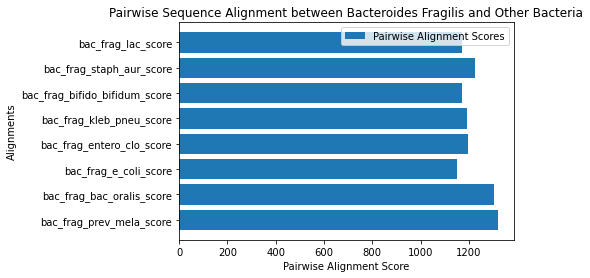

In [31]:
#plotting pairwise alignment scores in bar graph to show comparison between them 

#create horizontal bar graph and passing x (pairwise alignment score) and y coordinates (pair of bacteria being aligned) of the bars to the function 
plt.barh(["bac_frag_prev_mela_score", "bac_frag_bac_oralis_score", "bac_frag_e_coli_score", "bac_frag_entero_clo_score", "bac_frag_kleb_pneu_score", "bac_frag_bifido_bifidum_score", "bac_frag_staph_aur_score", "bac_frag_lac_score"], [bac_frag_prev_mela_score, bac_frag_bac_oralis_score, bac_frag_e_coli_score, bac_frag_entero_clo_score, bac_frag_kleb_pneu_score, bac_frag_bifido_bifidum_score, bac_frag_staph_aur_score, bac_frag_lac_score], align = 'center', label = 'Pairwise Alignment Scores')
plt.legend()

#adding labels for the x and y axes 
plt.ylabel('Alignments')
plt.xlabel('Pairwise Alignment Score')

#adding title to the whole bar graph 
plt.title('Pairwise Sequence Alignment between Bacteroides Fragilis and Other Bacteria')

#showing what bar graph looks like 
plt.show()

In [38]:
#Clustering
#sequence = [bac_frag_genome, prev_mela_genome, bac_oralis_genome, e_coli_genome, entero_clo_genome, kleb_pneu_genome, bifido_bifidum_genome, staph_aur_genome, lac_genome]
#Below sequence has the first 100 nucleotides loaded for each of the 9 bacteria to be analyzed 
sequence = ["ACAATGAAGAGTTTGATCCTGGCTCAGGATGAACGCTAGCTACAGGCTTAACACATGCAAGTCGAGGGGCATCAGGAAGAAAGCTTGCTTTCTTTGCTGG", "ACAATGAAGAGTTTGATCCTGGCTCAGGATGAACGCTAGCTACAGGCTTAACACATGCAAGTCGAGGGGCATCAGGAAGAAAGCTTGCTTTCTTTGCTGG", "GATGAACGCTAGCTACAGGCTTAACACATGCAAGTCGCGGGGCATCATGGAGGTTGTTTTCAACTTTTGATGGCGACCGGCGCACGGGTGAGTAACGCGT", "AGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAACGGTAACAGGAAGCAGCTTGCTGCTTTGCTGACGAGTGGCGGA", "AAATTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAACGGTAGCACAGAGAGCTTGCTCTCGGGTGACGAG", "AGAGTTTGATNNTGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGCACAGAGAGCTTGCTCTCGGGTGACGAGCGGCGGA", "GATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGGATCCATCAAGCTTGCTTGGTGGTGAGAGTGGCGAACGGGTGAGTAATGCGTGACCGA", "TTTATGGAGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGAACGGACGAGAAGCTTGCTTCTCTGATGTTAG", "TCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGAGCTGAACCAACAGATTCACTTCGGTGATGACGTTGGGAACGCGAGCG"]

#uncomment the below code to see if sequences were loaded properly 
#print(sequence)

#creating a matrix from strings of sequences using the numpy.fromstring function. This function translates each letter in a sequence to its ASCII counterpart 
matrix = np.asarray([np.fromstring(s, dtype=np.uint8) for s in sequence])
#uncomment code below to see whether matrix has been correctly formed from input sequences 
#print(matrix)

#use kcluster from Bio.Cluster package to take data matrix and cluster sequences 
clusterid,error,found = kcluster(matrix)

#printing the result of the cluster 
print(clusterid)

[0 0 0 1 0 0 0 0 1]


<ipython-input-38-2fded4e648af>:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  matrix = np.asarray([np.fromstring(s, dtype=np.uint8) for s in sequence])


In [34]:
#visualizing the cluster 

#Used the PCA module to reduce the number of dimensions so that the results can be visualized using a 2D scatter plot
pca = PCA(2)

#transform our matrix data containing the first 100 nucleotides to fit PCA dimensions 
df = pca.fit_transform(matrix)
df.shape

#Determining the number of clusters 
kmeans = KMeans(n_clusters = 4)
#kmeans.fit_predict returns the array of cluster labels each data point belongs to 
label = kmeans.fit_predict(df)
print(label)

[3 3 1 2 0 2 1 0 2]


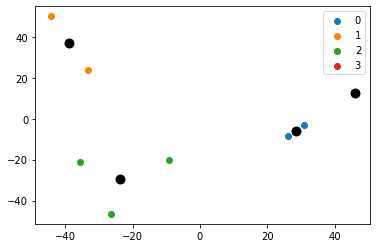

In [35]:
#Code below iterates filtering the data according to each unique class one iteration at a time 
u_labels = np.unique(label)
#kmeans.cluster_centers_ returns an array of centroids locations. Centroids are the data points at the center of a cluster.
centroids = kmeans.cluster_centers_

#plotting results of the unique classes and centroid locations 
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color = 'k')
plt.legend()
plt.show()